In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

**Importing Uber Fares CSV file**

In [38]:
file_path = '/home/uber.csv'
df = pd.read_csv(file_path)
df.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [37]:
df.head()

fare_amount          pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1          7.7  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2         12.9  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3          5.3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4         16.0  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  
0         -73.999512         40.723217  
1         -73.994710         40.750325  
2         -73.962565         40.772647  
3         -73.965316         40.803349  
4         -73.973082         40.761247

**Transforming columns**


*   Creating 'distance' column
*   Creating Weekday, day, minute, month, hour columns from pickup_datetime after converting to datetime data type



In [ ]:
from math import sqrt

lat1 = df['pickup_latitude']
lon1 = df['pickup_longitude']
lat2 = df['dropoff_latitude']
lon2 = df['dropoff_longitude']
df['distance'] = np.sqrt((lat1 - lat2)**2 + (lon1 - lon2)**2)

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime'] = df['pickup_datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])



df['weekday']=df['pickup_datetime'].dt.day_name()
df['day']=df['pickup_datetime'].dt.day
df['minute']=df['pickup_datetime'].dt.minute
df['month']=df['pickup_datetime'].dt.month
df['hour']=df['pickup_datetime'].dt.hour
df.head()

fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  distance   weekday  day  minute  \
0         -73.999512         40.723217  0.015140  Thursday    7      52   
1         -73.994710         40.750325  0.022103    Friday   17       4   
2         -73.962565         40.772647  0.053109    Monday   24      45   
3         -73.965316         40.803349  0.016528    Friday   26      22   
4         -73.973082         40.761247  0.051031  Thursday   28      47   

   month  hour  
0      5    19  
1      7    20  
2      8    21  
3      6     8  
4      8    17

**Visualising null values to remove**

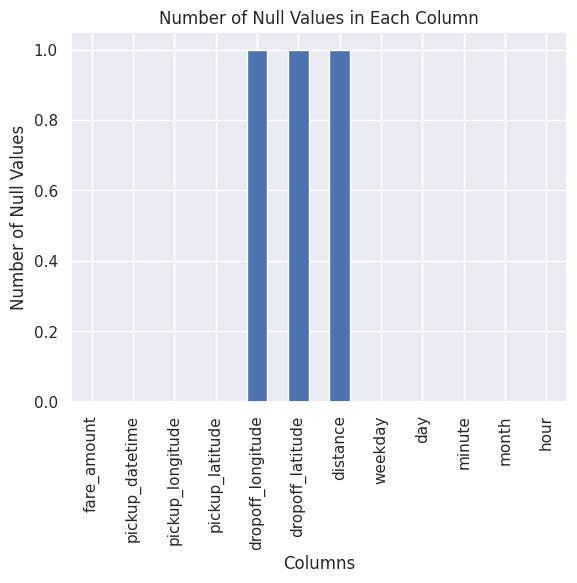

In [ ]:
null_values = df.isnull().sum()

null_values.plot(kind='bar')
plt.title('Number of Null Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

In [ ]:
df = df.dropna()

**Visualising outliers including negative fares which cannot exist**

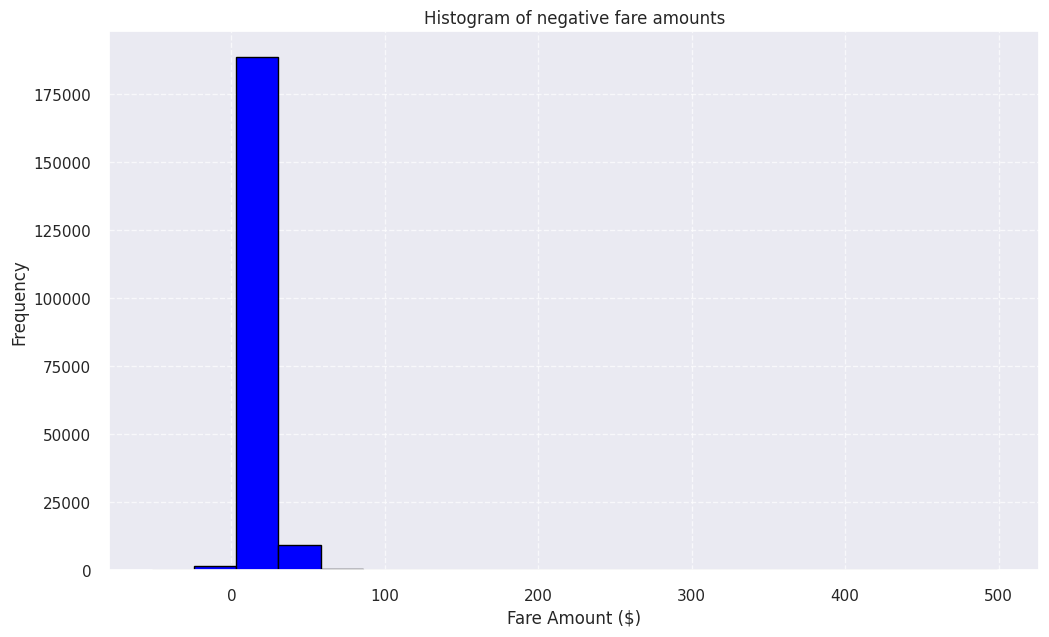

In [ ]:
uber_df = df[(df['fare_amount'] >= -50) & (df['fare_amount'] <= 0)]

# Plotting the histogram
plt.figure(figsize=(12, 7))
plt.hist(df['fare_amount'], bins=20, color='blue', edgecolor='black')

# Adding labels and title
plt.title('Histogram of negative fare amounts')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**Removing fare amount outliers and restricting New York City boundaries**

In [ ]:
uber_df = df[(df['pickup_longitude'] >= -74.2591) &
                 (df['pickup_longitude'] <= -73.7004) &
                 (df['pickup_latitude'] >= 40.4772) &
                 (df['pickup_latitude'] <= 40.774) & (df['fare_amount'] <= 300) & (df['fare_amount'] > 0)]

**Explatory Data Analysis (EDA)**

In [ ]:
uber_df.describe()

fare_amount                pickup_datetime  pickup_longitude  \
count  163437.000000                         163437     163437.000000   
mean       11.440001  2012-03-24 03:05:19.388345344        -73.978310   
min         0.010000            2009-01-01 01:59:17        -74.243432   
25%         6.100000            2010-08-25 09:17:00        -73.994286   
50%         8.500000            2012-03-23 22:28:00        -73.985260   
75%        12.500000            2013-10-22 08:31:59        -73.973916   
max       230.000000            2015-06-30 23:40:39        -73.702735   
std         9.870092                            NaN          0.035949   

       pickup_latitude  dropoff_longitude  dropoff_latitude       distance  \
count    163437.000000      163437.000000     163437.000000  163437.000000   
mean         40.743810         -73.909607         40.713683       0.121877   
min          40.498988        -737.916665         -0.563333       0.000000   
25%          40.732510         -73.992975         40.731990       0.012796   
50%          40.748800         -73.982283         40.750407       0.021536   
75%          40.760530         -73.968700         40.763768       0.038675   
max          40.774000           0.000213        493.533332     663.900610   
std           0.023453           2.808930          1.649655       3.255903   

                 day         minute          month           hour  
count  163437.000000  163437.000000  163437.000000  163437.000000  
mean       15.711626      29.558191       6.281937      13.469263  
min         1.000000       0.000000       1.000000       0.000000  
25%         8.000000      14.000000       3.000000       9.000000  
50%        16.000000      30.000000       6.000000      14.000000  
75%        23.000000      45.000000       9.000000      19.000000  
max        31.000000      59.000000      12.000000      23.000000  
std         8.687736      17.350863       3.434046       6.654499

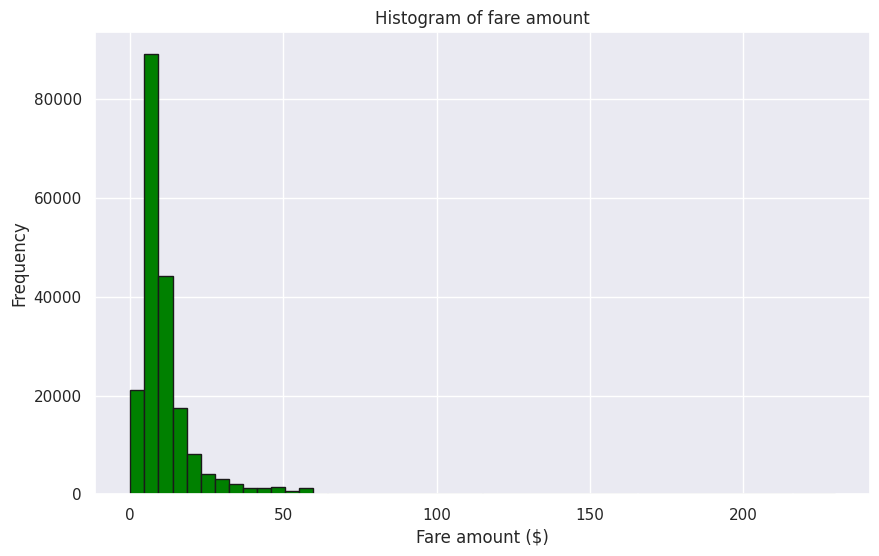

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(uber_df['fare_amount'], bins=50, edgecolor='k', color='green')
plt.title('Histogram of fare amount')
plt.xlabel('Fare amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Text(0.5, 0, 'work hour')

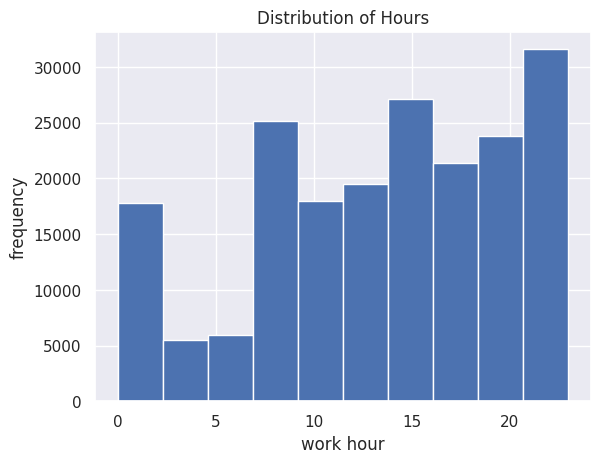

In [ ]:
plt.hist(uber_df['hour'])
plt.title('Distribution of Hours')
plt.xlabel('Hour')
plt.ylabel('frequency')
plt.xlabel('work hour')

In [ ]:
import os

import plotly.express as px
import plotly.graph_objects as go

colors = ['lightslategray',] * 5
colors[0] = 'green'

fig = go.Figure(data=[go.Bar(
    x=df['weekday'].value_counts().index,
    y=df['weekday'].value_counts().values,
    marker_color=colors
)])
fig.update_layout(title_text='Busiest days for Uber Trips')



In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd



m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

heat_data = [[row['pickup_latitude'], row['pickup_longitude'], row['fare_amount']] for index, row in uber_df.iterrows()]

HeatMap(heat_data, radius=15, max_zoom=13).add_to(m)

m.save('heatmap.html')
m

**K-means clustering modelling**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(uber_df[['pickup_latitude', 'pickup_longitude']], uber_df[['fare_amount']], test_size=0.33, random_state=0)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans.fit(X_train)

KMeans(n_clusters=4, n_init='auto', random_state=0)

<Axes: xlabel='pickup_longitude', ylabel='pickup_latitude'>

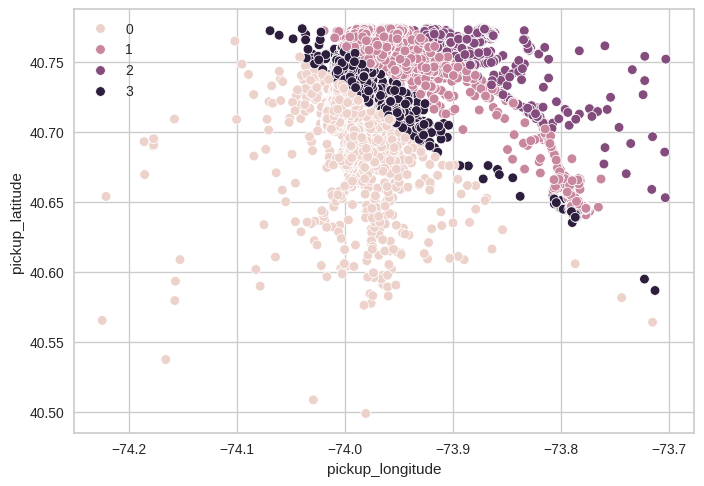

In [ ]:
sns.scatterplot(data = X_train, x = 'pickup_longitude', y = 'pickup_latitude', hue = kmeans.labels_)


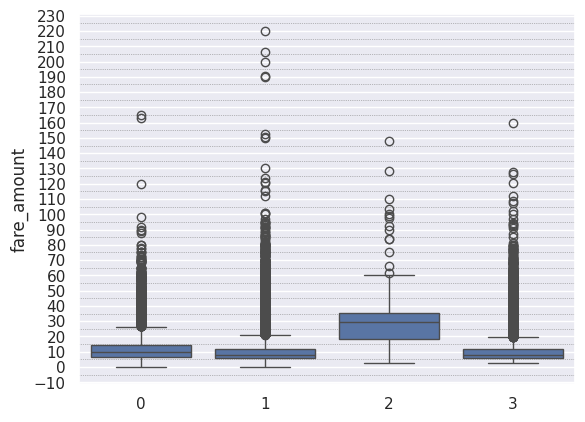

In [ ]:
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
sns.boxplot(x = kmeans.labels_, y = y_train['fare_amount'])

ax = plt.gca()

ax.yaxis.set_major_locator(MultipleLocator(10))


ax.yaxis.set_minor_locator(MultipleLocator(5))


ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')


plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

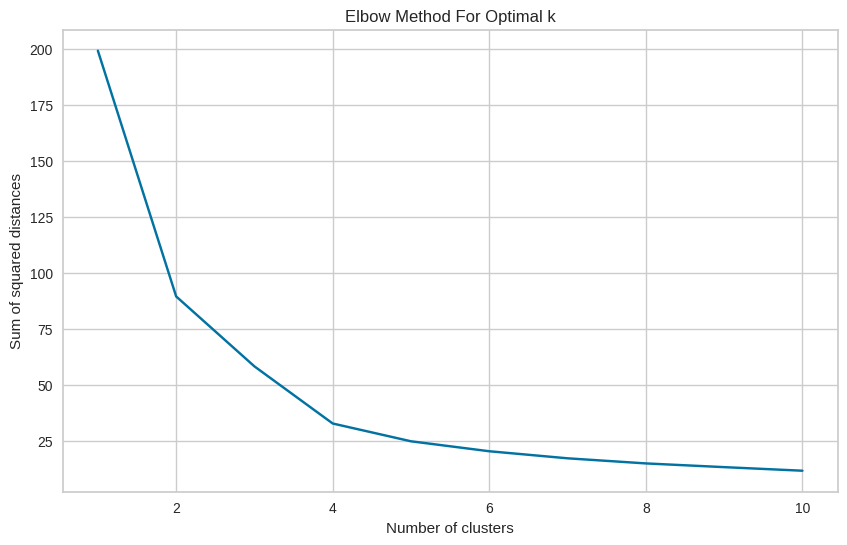

In [ ]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


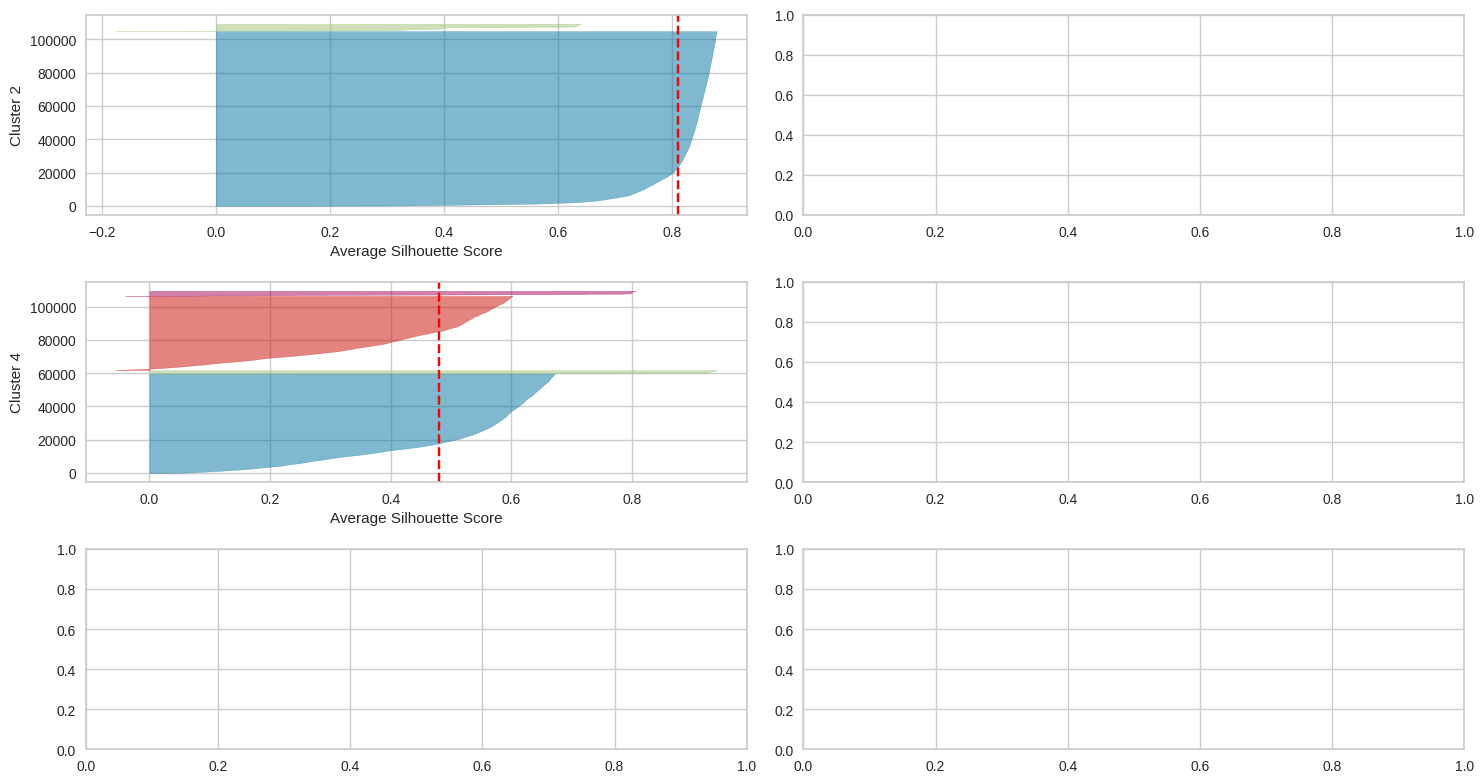

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 4]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train)
    visualizer.ax.set_ylabel(f'Cluster {i}')
    visualizer.ax.set_xlabel('Average Silhouette Score')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

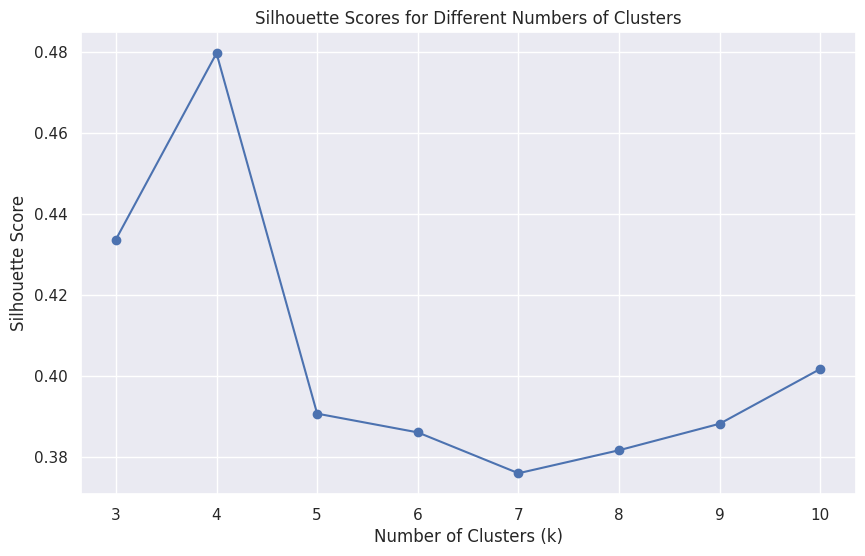

In [ ]:
range_n_clusters = list(range(3, 11))

# List to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for different numbers of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()